# <center>Network Science</center>

**Due Date:** 08.05.2020 18:00 <br>
**Late submission policy:** -1 points per day <br>


Please send your reports to <iakarpov@hse.ru> with message subject of the following structure: <br>
**[HSE SNA Magolego 2020] *{LastName}* *{First Name}* HW_*{Number}***

Support your computations with figures and comments. <br>
If you are using IPython Notebook you may use this file as a starting point of your report.

### Task 1. Data preparation

<img src ="https://dl.dropboxusercontent.com/s/nt1tbmathgo3gg8/g1.png?dl=1" style="width:600px;heigth:200px">

1.1. Load [VKontakte](https://dl.dropboxusercontent.com/s/8eo1sjfhu5spb0f/vk.tsv?dl=1) dataset to NetworkX <br>
1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only `seed` and `friends#1` nodes, only `r0`, `r1`, `r2` edges) <br>
1.3. Find graph diameter, average and global clustering coefficient <br>
1.4. Find max and mean values of incoming and outcoming node degrees <br>
1.5. Vizualize your graph in gephi, networkX and grahistry <br>


1.1. Load VKontakte dataset to NetworkX 

In [1]:
#загрузка необходимых для работы библиотек

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [2]:
# создание массива с данными из файла vk.tsv
df = pd.read_csv('vk.tsv',sep = '\t')
df

Unnamed: 0       Friends            ID             Name
0                0    VK_4766099   VK_97803804  Никита Кузнецов
1                1    VK_5227712   VK_97803804  Никита Кузнецов
2                2   VK_11047376   VK_97803804  Никита Кузнецов
3                3   VK_11079816   VK_97803804  Никита Кузнецов
4                4   VK_14492163   VK_97803804  Никита Кузнецов
5                5   VK_15318658   VK_97803804  Никита Кузнецов
6                6   VK_15537634   VK_97803804  Никита Кузнецов
7                7   VK_20039762   VK_97803804  Никита Кузнецов
8                8   VK_20389327   VK_97803804  Никита Кузнецов
9                9   VK_20682010   VK_97803804  Никита Кузнецов
10              10   VK_22653909   VK_97803804  Никита Кузнецов
11              11   VK_23387248   VK_97803804  Никита Кузнецов
12              12   VK_24932811   VK_97803804  Никита Кузнецов
13              13   VK_26506145   VK_97803804  Никита Кузнецов
14              14   VK_26615965   VK_97803804  Никита Кузнецов
15              15   VK_27183099   VK_97803804  Никита Кузнецов
16              16   VK_29203361   VK_97803804  Никита Кузнецов
17              17   VK_30229819   VK_97803804  Никита Кузнецов
18              18   VK_30668712   VK_97803804  Никита Кузнецов
19              19   VK_32142356   VK_97803804  Никита Кузнецов
20              20   VK_35689226   VK_97803804  Никита Кузнецов
21              21   VK_36530173   VK_97803804  Никита Кузнецов
22              22   VK_36752287   VK_97803804  Никита Кузнецов
23              23   VK_37400496   VK_97803804  Никита Кузнецов
24              24   VK_38120666   VK_97803804  Никита Кузнецов
25              25   VK_39085816   VK_97803804  Никита Кузнецов
26              26   VK_39192091   VK_97803804  Никита Кузнецов
27              27   VK_39296573   VK_97803804  Никита Кузнецов
28              28   VK_39801310   VK_97803804  Никита Кузнецов
29              29   VK_39949519   VK_97803804  Никита Кузнецов
...            ...           ...           ...              ...
125595     1835791   VK_91765803  VK_182446981   Макс Гарькавый
125596     1835794   VK_96112869  VK_182446981   Макс Гарькавый
125597     1835795   VK_96282487  VK_182446981   Макс Гарькавый
125598     1835798  VK_100023671  VK_182446981   Макс Гарькавый
125599     1835800  VK_104182480  VK_182446981   Макс Гарькавый
125600     1835801  VK_107920824  VK_182446981   Макс Гарькавый
125601     1835802  VK_110248399  VK_182446981   Макс Гарькавый
125602     1835803  VK_114227121  VK_182446981   Макс Гарькавый
125603     1835804  VK_115438473  VK_182446981   Макс Гарькавый
125604     1835807  VK_122254289  VK_182446981   Макс Гарькавый
125605     1835809  VK_133680326  VK_182446981   Макс Гарькавый
125606     1835811  VK_136691537  VK_182446981   Макс Гарькавый
125607     1835816  VK_143077741  VK_182446981   Макс Гарькавый
125608     1835820  VK_157350650  VK_182446981   Макс Гарькавый
125609     1835823  VK_166058564  VK_182446981   Макс Гарькавый
125610     1835825  VK_173628615  VK_182446981   Макс Гарькавый
125611     1835827  VK_175485225  VK_182446981   Макс Гарькавый
125612     1835828  VK_180641436  VK_182446981   Макс Гарькавый
125613     1835833  VK_221940034  VK_182446981   Макс Гарькавый
125614     1835834  VK_223398996  VK_182446981   Макс Гарькавый
125615     1835838  VK_237025503  VK_182446981   Макс Гарькавый
125616     1835839  VK_252064505  VK_182446981   Макс Гарькавый
125617     1835842  VK_260336970  VK_182446981   Макс Гарькавый
125618     1835843  VK_269517596  VK_182446981   Макс Гарькавый
125619     1835845  VK_289932255  VK_182446981   Макс Гарькавый
125620     1835846  VK_313242491  VK_182446981   Макс Гарькавый
125621     1835847  VK_314205177  VK_182446981   Макс Гарькавый
125622     1835848  VK_319266898  VK_182446981   Макс Гарькавый
125623     1835849  VK_322307249  VK_182446981   Макс Гарькавый
125624     1835855  VK_554324849  VK_182446981   Макс Гарькавый

[125625 rows x 4 columns]

1.2. Choose 3-5 nodes from the existing network and create the subgraph with network framing (only seed and friends#1 nodes, only r0, r1, r2 edges) 

In [3]:
#находим уникальные значения id, чтобы выбрать 3-5 seed
ids = list(df["ID"].unique())
ids

['VK_97803804',
 'VK_73555158',
 'VK_155630933',
 'VK_65606427',
 'VK_15173617',
 'VK_98950709',
 'VK_321512099',
 'VK_82512790',
 'VK_38096132',
 'VK_32003717',
 'VK_88475260',
 'VK_55473678',
 'VK_259166514',
 'VK_556768320',
 'VK_20485849',
 'VK_107202344',
 'VK_97924442',
 'VK_382481084',
 'VK_138043138',
 'VK_15945852',
 'VK_73252139',
 'VK_55567131',
 'VK_258600596',
 'VK_65841267',
 'VK_39085816',
 'VK_11686056',
 'VK_11754426',
 'VK_13313132',
 'VK_13360261',
 'VK_13985194',
 'VK_14038260',
 'VK_14918944',
 'VK_15761824',
 'VK_16020423',
 'VK_17168690',
 'VK_17966003',
 'VK_18410997',
 'VK_18506763',
 'VK_20794250',
 'VK_20897910',
 'VK_21330320',
 'VK_22293074',
 'VK_22798140',
 'VK_26234476',
 'VK_30488669',
 'VK_32215619',
 'VK_35230163',
 'VK_36639406',
 'VK_38147532',
 'VK_40897982',
 'VK_40964865',
 'VK_42359288',
 'VK_43369492',
 'VK_50522563',
 'VK_53442311',
 'VK_64362649',
 'VK_67192615',
 'VK_70245570',
 'VK_74920120',
 'VK_77231089',
 'VK_80275427',
 'VK_85640972',


In [4]:
#формируем массив с seed и их друзьями 
df1=df[df.ID.astype(str).isin(['VK_43555697','VK_382481084','VK_65606427', 'VK_15173617'])]
df1

Unnamed: 0       Friends           ID           Name
682           682      VK_14603  VK_65606427  Полина Быкова
683           683     VK_369694  VK_65606427  Полина Быкова
684           684     VK_498989  VK_65606427  Полина Быкова
685           685    VK_1231116  VK_65606427  Полина Быкова
686           686    VK_1499191  VK_65606427  Полина Быкова
687           687    VK_1756709  VK_65606427  Полина Быкова
688           688    VK_2026037  VK_65606427  Полина Быкова
689           689    VK_2222642  VK_65606427  Полина Быкова
690           690    VK_2281615  VK_65606427  Полина Быкова
691           691    VK_3713091  VK_65606427  Полина Быкова
692           692    VK_4099762  VK_65606427  Полина Быкова
693           693    VK_5123566  VK_65606427  Полина Быкова
694           694    VK_5282865  VK_65606427  Полина Быкова
695           695    VK_5287685  VK_65606427  Полина Быкова
696           696    VK_5316703  VK_65606427  Полина Быкова
697           697    VK_5841712  VK_65606427  Полина Быкова
698           698    VK_7444312  VK_65606427  Полина Быкова
699           699    VK_7656877  VK_65606427  Полина Быкова
700           700    VK_8455359  VK_65606427  Полина Быкова
701           701    VK_8469928  VK_65606427  Полина Быкова
702           702    VK_8806386  VK_65606427  Полина Быкова
703           703    VK_9292673  VK_65606427  Полина Быкова
704           704    VK_9462843  VK_65606427  Полина Быкова
705           705    VK_9487550  VK_65606427  Полина Быкова
706           706    VK_9744644  VK_65606427  Полина Быкова
707           707   VK_10511792  VK_65606427  Полина Быкова
708           708   VK_10560855  VK_65606427  Полина Быкова
709           709   VK_10944358  VK_65606427  Полина Быкова
710           710   VK_11027143  VK_65606427  Полина Быкова
711           711   VK_11691365  VK_65606427  Полина Быкова
...           ...           ...          ...            ...
46001      778934   VK_16934135  VK_43555697   Лена Рыбкина
46002      778947   VK_27076725  VK_43555697   Лена Рыбкина
46003      778948   VK_27348700  VK_43555697   Лена Рыбкина
46004      778949   VK_30030489  VK_43555697   Лена Рыбкина
46005      778956   VK_36826373  VK_43555697   Лена Рыбкина
46006      778971   VK_48828184  VK_43555697   Лена Рыбкина
46007      778974   VK_55921868  VK_43555697   Лена Рыбкина
46008      778976   VK_59275832  VK_43555697   Лена Рыбкина
46009      778978   VK_61245082  VK_43555697   Лена Рыбкина
46010      778980   VK_65405332  VK_43555697   Лена Рыбкина
46011      778981   VK_65606427  VK_43555697   Лена Рыбкина
46012      778983   VK_67915346  VK_43555697   Лена Рыбкина
46013      778984   VK_71251406  VK_43555697   Лена Рыбкина
46014      778990   VK_84772248  VK_43555697   Лена Рыбкина
46015      778993   VK_87595695  VK_43555697   Лена Рыбкина
46016      778997   VK_93011910  VK_43555697   Лена Рыбкина
46017      779000   VK_99712228  VK_43555697   Лена Рыбкина
46018      779006  VK_121922530  VK_43555697   Лена Рыбкина
46019      779007  VK_122548237  VK_43555697   Лена Рыбкина
46020      779016  VK_140670158  VK_43555697   Лена Рыбкина
46021      779023  VK_146260315  VK_43555697   Лена Рыбкина
46022      779024  VK_147775015  VK_43555697   Лена Рыбкина
46023      779031  VK_180656991  VK_43555697   Лена Рыбкина
46024      779032  VK_183550811  VK_43555697   Лена Рыбкина
46025      779035  VK_201268591  VK_43555697   Лена Рыбкина
46026      779040  VK_234171334  VK_43555697   Лена Рыбкина
46027      779042  VK_240901991  VK_43555697   Лена Рыбкина
46028      779044  VK_242644466  VK_43555697   Лена Рыбкина
46029      779056  VK_382481084  VK_43555697   Лена Рыбкина
46030      779058  VK_387797072  VK_43555697   Лена Рыбкина

[1020 rows x 4 columns]

In [5]:
list(df1["Name"].unique())

['Полина Быкова', 'Елизавета Митрофанова', 'Rišards Jurans', 'Лена Рыбкина']

In [6]:
#список уникальных друзей выбранных seeds
friends = list(df1["Friends"].unique())
friends

['VK_14603',
 'VK_369694',
 'VK_498989',
 'VK_1231116',
 'VK_1499191',
 'VK_1756709',
 'VK_2026037',
 'VK_2222642',
 'VK_2281615',
 'VK_3713091',
 'VK_4099762',
 'VK_5123566',
 'VK_5282865',
 'VK_5287685',
 'VK_5316703',
 'VK_5841712',
 'VK_7444312',
 'VK_7656877',
 'VK_8455359',
 'VK_8469928',
 'VK_8806386',
 'VK_9292673',
 'VK_9462843',
 'VK_9487550',
 'VK_9744644',
 'VK_10511792',
 'VK_10560855',
 'VK_10944358',
 'VK_11027143',
 'VK_11691365',
 'VK_11971162',
 'VK_12337166',
 'VK_12372562',
 'VK_12789442',
 'VK_12833408',
 'VK_13032017',
 'VK_14004335',
 'VK_14268041',
 'VK_14300552',
 'VK_14825074',
 'VK_15113412',
 'VK_16659781',
 'VK_16804706',
 'VK_16920959',
 'VK_16934135',
 'VK_17836194',
 'VK_18029692',
 'VK_18445389',
 'VK_18473276',
 'VK_18572146',
 'VK_19800527',
 'VK_20282669',
 'VK_21108097',
 'VK_21475372',
 'VK_21737084',
 'VK_21800086',
 'VK_22014918',
 'VK_22430514',
 'VK_22598348',
 'VK_22622648',
 'VK_23059097',
 'VK_23178853',
 'VK_23487055',
 'VK_24242355',
 'VK_

In [7]:
ids = list(df1["ID"].unique())
ids

['VK_65606427', 'VK_15173617', 'VK_382481084', 'VK_43555697']

In [8]:
#создание массива в котором есть друзья выбранных seed
df2=df[df.ID.astype(str).isin(friends)]
df2

Unnamed: 0       Friends            ID           Name
682            682      VK_14603   VK_65606427  Полина Быкова
683            683     VK_369694   VK_65606427  Полина Быкова
684            684     VK_498989   VK_65606427  Полина Быкова
685            685    VK_1231116   VK_65606427  Полина Быкова
686            686    VK_1499191   VK_65606427  Полина Быкова
687            687    VK_1756709   VK_65606427  Полина Быкова
688            688    VK_2026037   VK_65606427  Полина Быкова
689            689    VK_2222642   VK_65606427  Полина Быкова
690            690    VK_2281615   VK_65606427  Полина Быкова
691            691    VK_3713091   VK_65606427  Полина Быкова
692            692    VK_4099762   VK_65606427  Полина Быкова
693            693    VK_5123566   VK_65606427  Полина Быкова
694            694    VK_5282865   VK_65606427  Полина Быкова
695            695    VK_5287685   VK_65606427  Полина Быкова
696            696    VK_5316703   VK_65606427  Полина Быкова
697            697    VK_5841712   VK_65606427  Полина Быкова
698            698    VK_7444312   VK_65606427  Полина Быкова
699            699    VK_7656877   VK_65606427  Полина Быкова
700            700    VK_8455359   VK_65606427  Полина Быкова
701            701    VK_8469928   VK_65606427  Полина Быкова
702            702    VK_8806386   VK_65606427  Полина Быкова
703            703    VK_9292673   VK_65606427  Полина Быкова
704            704    VK_9462843   VK_65606427  Полина Быкова
705            705    VK_9487550   VK_65606427  Полина Быкова
706            706    VK_9744644   VK_65606427  Полина Быкова
707            707   VK_10511792   VK_65606427  Полина Быкова
708            708   VK_10560855   VK_65606427  Полина Быкова
709            709   VK_10944358   VK_65606427  Полина Быкова
710            710   VK_11027143   VK_65606427  Полина Быкова
711            711   VK_11691365   VK_65606427  Полина Быкова
...            ...           ...           ...            ...
125536     1835633  VK_293986558  VK_180641436   Павел Самусь
125537     1835637  VK_297740417  VK_180641436   Павел Самусь
125538     1835639  VK_308917697  VK_180641436   Павел Самусь
125539     1835642  VK_311988718  VK_180641436   Павел Самусь
125540     1835643  VK_313242491  VK_180641436   Павел Самусь
125541     1835644  VK_314205177  VK_180641436   Павел Самусь
125542     1835645  VK_315346839  VK_180641436   Павел Самусь
125543     1835647  VK_315811211  VK_180641436   Павел Самусь
125544     1835652  VK_318917805  VK_180641436   Павел Самусь
125545     1835653  VK_319266898  VK_180641436   Павел Самусь
125546     1835654  VK_319531353  VK_180641436   Павел Самусь
125547     1835656  VK_320269278  VK_180641436   Павел Самусь
125548     1835657  VK_321150374  VK_180641436   Павел Самусь
125549     1835659  VK_321313578  VK_180641436   Павел Самусь
125550     1835660  VK_321425327  VK_180641436   Павел Самусь
125551     1835663  VK_322307249  VK_180641436   Павел Самусь
125552     1835666  VK_324374633  VK_180641436   Павел Самусь
125553     1835668  VK_326779584  VK_180641436   Павел Самусь
125554     1835670  VK_332056191  VK_180641436   Павел Самусь
125555     1835676  VK_348477031  VK_180641436   Павел Самусь
125556     1835687  VK_376164908  VK_180641436   Павел Самусь
125557     1835692  VK_381967189  VK_180641436   Павел Самусь
125558     1835693  VK_382481084  VK_180641436   Павел Самусь
125559     1835694  VK_390096835  VK_180641436   Павел Самусь
125560     1835704  VK_433877915  VK_180641436   Павел Самусь
125561     1835714  VK_489891587  VK_180641436   Павел Самусь
125562     1835718  VK_515246176  VK_180641436   Павел Самусь
125563     1835719  VK_547655075  VK_180641436   Павел Самусь
125564     1835720  VK_554324849  VK_180641436   Павел Самусь
125565     1835722  VK_559976420  VK_180641436   Павел Самусь

[18942 rows x 4 columns]

In [9]:
id2=list(df2["Name"].unique())
id2

['Полина Быкова',
 'Rišards Jurans',
 'Екатерина Смирнова',
 'Алексей Орехов',
 'Николай Владимирович',
 'Алексей Ежов',
 'Лялько Куприна',
 'Константин Шорыгин',
 'Кристина Акопян',
 'Алиса Кузнецова',
 'Петя Гиндилис',
 'Алёна Скобелева',
 'Kirill Khachaturyan',
 'Антон Гаврилов',
 'Давид Геворгян',
 'Иван Макаров',
 'Александр Гиринский',
 'Ника Дундуа',
 'Анастасия Опара',
 'Артем Шахпаронов',
 'Лена Старченко',
 'Сергей Коротких',
 'Валентин Балунов',
 'Александра Гаркуша',
 'Маша Бабичева',
 'Андрей Жупиков',
 'Ната Агафонова',
 'Григорий Левонтин',
 'Надя Матвеева',
 'Антон Михайлов',
 'Артем Григорьев',
 'Данил Нолан',
 'Зоя Симонова',
 'Галя Шкумат',
 'Александр Челноков',
 'Владимир Панов',
 'Daria Miroshkina',
 'Павел Рудченко',
 'Антон Катон',
 'Сергей Панюшкин',
 'Max Gerchikov',
 'Даша Жилкина',
 'Ника Герн',
 'Миша Гойхман',
 'Кристина Нормальная',
 'Василий Чеченов',
 'Анастаси М.',
 'Юля Карпушенкова',
 'Панна Федорова',
 'Данила Меркурьев',
 'Игорь Козырев',
 'Вагиз Н

In [10]:
#создание массива, в котором есть seeds и friends#1
result = df1.append(df2)
result

Unnamed: 0       Friends            ID           Name
682            682      VK_14603   VK_65606427  Полина Быкова
683            683     VK_369694   VK_65606427  Полина Быкова
684            684     VK_498989   VK_65606427  Полина Быкова
685            685    VK_1231116   VK_65606427  Полина Быкова
686            686    VK_1499191   VK_65606427  Полина Быкова
687            687    VK_1756709   VK_65606427  Полина Быкова
688            688    VK_2026037   VK_65606427  Полина Быкова
689            689    VK_2222642   VK_65606427  Полина Быкова
690            690    VK_2281615   VK_65606427  Полина Быкова
691            691    VK_3713091   VK_65606427  Полина Быкова
692            692    VK_4099762   VK_65606427  Полина Быкова
693            693    VK_5123566   VK_65606427  Полина Быкова
694            694    VK_5282865   VK_65606427  Полина Быкова
695            695    VK_5287685   VK_65606427  Полина Быкова
696            696    VK_5316703   VK_65606427  Полина Быкова
697            697    VK_5841712   VK_65606427  Полина Быкова
698            698    VK_7444312   VK_65606427  Полина Быкова
699            699    VK_7656877   VK_65606427  Полина Быкова
700            700    VK_8455359   VK_65606427  Полина Быкова
701            701    VK_8469928   VK_65606427  Полина Быкова
702            702    VK_8806386   VK_65606427  Полина Быкова
703            703    VK_9292673   VK_65606427  Полина Быкова
704            704    VK_9462843   VK_65606427  Полина Быкова
705            705    VK_9487550   VK_65606427  Полина Быкова
706            706    VK_9744644   VK_65606427  Полина Быкова
707            707   VK_10511792   VK_65606427  Полина Быкова
708            708   VK_10560855   VK_65606427  Полина Быкова
709            709   VK_10944358   VK_65606427  Полина Быкова
710            710   VK_11027143   VK_65606427  Полина Быкова
711            711   VK_11691365   VK_65606427  Полина Быкова
...            ...           ...           ...            ...
125536     1835633  VK_293986558  VK_180641436   Павел Самусь
125537     1835637  VK_297740417  VK_180641436   Павел Самусь
125538     1835639  VK_308917697  VK_180641436   Павел Самусь
125539     1835642  VK_311988718  VK_180641436   Павел Самусь
125540     1835643  VK_313242491  VK_180641436   Павел Самусь
125541     1835644  VK_314205177  VK_180641436   Павел Самусь
125542     1835645  VK_315346839  VK_180641436   Павел Самусь
125543     1835647  VK_315811211  VK_180641436   Павел Самусь
125544     1835652  VK_318917805  VK_180641436   Павел Самусь
125545     1835653  VK_319266898  VK_180641436   Павел Самусь
125546     1835654  VK_319531353  VK_180641436   Павел Самусь
125547     1835656  VK_320269278  VK_180641436   Павел Самусь
125548     1835657  VK_321150374  VK_180641436   Павел Самусь
125549     1835659  VK_321313578  VK_180641436   Павел Самусь
125550     1835660  VK_321425327  VK_180641436   Павел Самусь
125551     1835663  VK_322307249  VK_180641436   Павел Самусь
125552     1835666  VK_324374633  VK_180641436   Павел Самусь
125553     1835668  VK_326779584  VK_180641436   Павел Самусь
125554     1835670  VK_332056191  VK_180641436   Павел Самусь
125555     1835676  VK_348477031  VK_180641436   Павел Самусь
125556     1835687  VK_376164908  VK_180641436   Павел Самусь
125557     1835692  VK_381967189  VK_180641436   Павел Самусь
125558     1835693  VK_382481084  VK_180641436   Павел Самусь
125559     1835694  VK_390096835  VK_180641436   Павел Самусь
125560     1835704  VK_433877915  VK_180641436   Павел Самусь
125561     1835714  VK_489891587  VK_180641436   Павел Самусь
125562     1835718  VK_515246176  VK_180641436   Павел Самусь
125563     1835719  VK_547655075  VK_180641436   Павел Самусь
125564     1835720  VK_554324849  VK_180641436   Павел Самусь
125565     1835722  VK_559976420  VK_180641436   Павел Самусь

[19962 rows x 4 columns]

In [11]:
print(len(friends))

949


In [19]:
G_small = nx.Graph()
count = 0

node_set = set()
#pbar = tqdm(total=len(df_2795), desc='nodes')
for index, row in result.iterrows():
    if row["ID"] not in G_small.nodes():
        G_small.add_node(row["ID"], attr_dict = {'Name':row["Name"]})
    #pbar.update(1)
#pbar = tqdm(total=len(df_2795), desc='edges')
for index, row in result.iterrows():
    if (row["ID"], row["Friends"]) not in G_small.edges() and (row["Friends"], row["ID"]) not in G_small.edges():
        G_small.add_edge(row["ID"], row["Friends"])    
    #pbar.update(1)

In [20]:
print(nx.info(G_small))
print ("Number of connected components", nx.number_connected_components(G_small))

Name: 
Type: Graph
Number of nodes: 2507
Number of edges: 14348
Average degree:  11.4464
Number of connected components 1


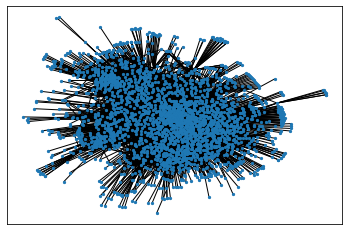

In [21]:
#получившаяся сеть в networkx
pos = nx.spring_layout(G_small)
nx.draw_networkx(G_small, pos = pos, with_labels=False, node_size = 5)

In [22]:
# matplotlib.rcParams.update({'font.size': 22})
lbls =  {n: df1["Name"]+n[:2] for n, d in G_small.nodes(data=True)}
# lbls =  {n: d["label"] for n, d in G.nodes(data=True)}
# lbls

1.3. Find graph diameter, average and global clustering coefficient 

In [23]:
largest_component = max(nx.connected_components(G_small), key=len)
G2 = G_small.subgraph(largest_component)
print("Diameter of connected component -", nx.diameter(G2))
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")

Diameter of connected component - 7
Average clustering coefficient - 0.32 



In [31]:
coord = nx.spring_layout(G_small, k = 0.15)

(-0.95, 1.05, -1.0, 0.75)

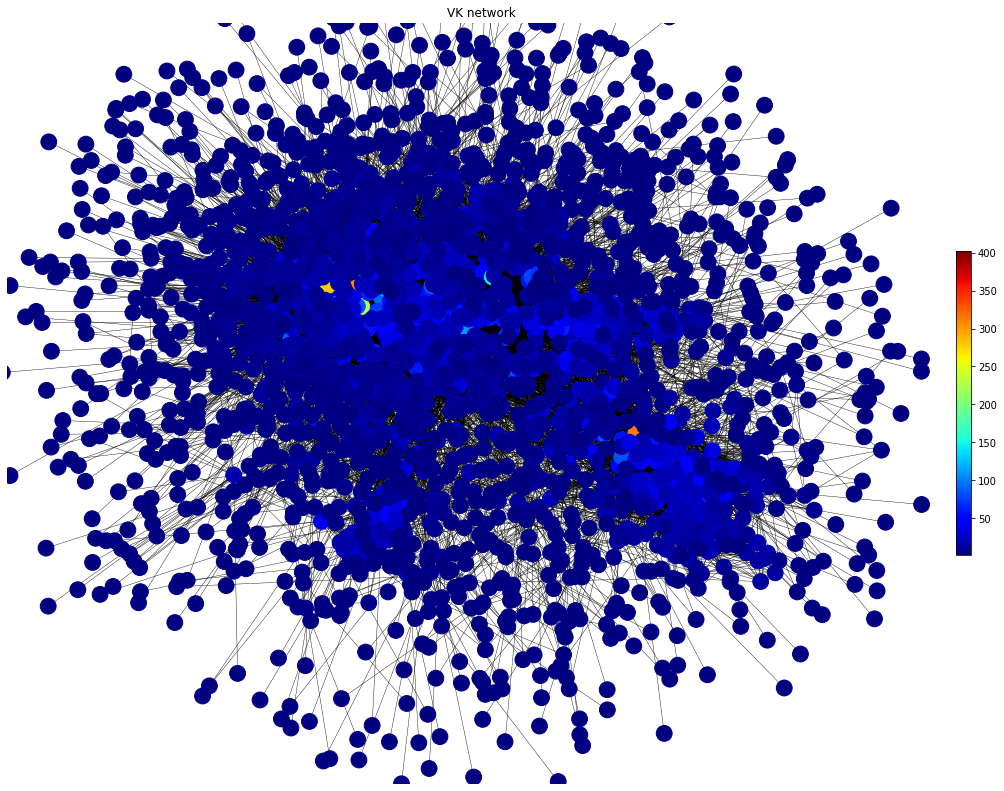

In [32]:
plt.figure(figsize=(20,14))
# k = nx.degree(G_small)
k = dict (G_small.degree ())
# print(k)
# set nodes' colors according to their degrees:
node_colors = list(k.values())

nodes = nx.draw_networkx_nodes(G_small, pos = coord, 
                               node_color=node_colors, 
                               node_size = 250, 
                               nodelist=list(k.keys()),                
                               with_labels = False,
                               cmap = 'jet')
edges = nx.draw_networkx_edges(G_small, pos = coord, width = .4)

# the borders can be then reduced to zoom in the graph:
plt.xlim([-.95, 1.05])
plt.ylim([-1., .75])
# add colorbar to see which nodes have the highest degrees:
plt.colorbar(nodes, shrink = .4, pad = .0005, aspect = 20)
plt.title('VK network')
plt.axis("off")

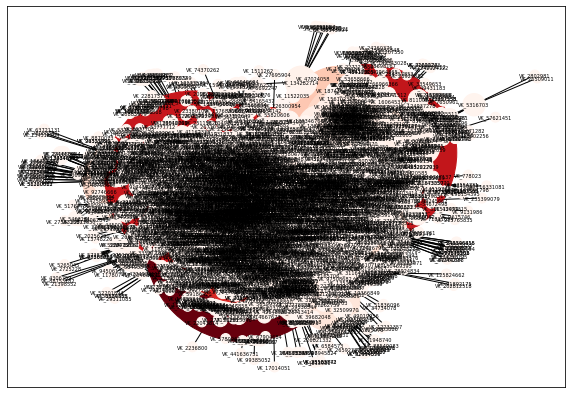

In [37]:
k = nx.degree(G_small)
plt.figure(1, figsize=(10,7))
coord = nx.spring_layout(G_small)
nx.draw_networkx(G_small,
                 pos=coord,
                 nodelist=list(dict(k).keys()),
                 node_size = [d*100 for d in list(dict(k).values())],
                 node_color=list(dict(k).values()),
                 font_size=5,
                 cmap=plt.cm.Reds,
                 )

к сожалению, на основе данной схемы не можем сделать однозначных выводов слишком много информации на схеме и это делает ее нечитабельной

In [38]:
# function to create proper histogram in matplotlib:
def plot_hist(data, colormap, alpha, bins = 10, round_value = 1):
    cm = plt.cm.get_cmap(colormap)
    counts, bins, patches = plt.hist(data, alpha = alpha, color = 'Blue', bins = bins)
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    bin_centers = 0.5 * (bins[:-1] + bins[1:])
    plt.xticks(bins.round(round_value))
    col = bin_centers - min(bin_centers)
    col /= max(col)
    # use various colors for different bins:
    for c, p in zip(col, patches):
        plt.setp(p, 'facecolor', cm(c))
    plt.xticks(fontsize = 12)
    plt.yticks(fontsize = 12)

1.4. Find max and mean values of incoming and outcoming node degrees 

In [39]:
# Once again discriptive statistics for G_small

print('Number of vertices:', G_small.number_of_nodes())
print('Number of edges:', G_small.number_of_edges())
print('Number of connected components', nx.number_connected_components(G_small))

degrees_dictionary = dict(G_small.degree())
degrees = np.array(list(dict(G_small.degree()).values()))


Number of vertices: 2507
Number of edges: 14348
Number of connected components 1


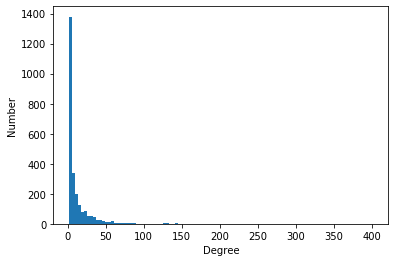

Diameter: 7
Clustering Coefficient: 0.16942898497543474
Average clustering coefficient - 0.32 

Max degree: 402
Mean degree 11.44635021938572


In [40]:
def get_metrics(graph):
    dginfo = list(dict((x, y) for x, y in nx.degree(graph)).values())
    gm = list(graph.subgraph(c) for c in nx.connected_components(graph))
    gm.sort(key=lambda c: c.size(), reverse=True)
    # degrees, max, mean, diameter, cc    
    return dginfo, max(dginfo), np.mean(dginfo), nx.diameter(gm[0]), nx.transitivity(graph)

dgrs, max_d, mean_d, g_dm, clust_c = get_metrics(G_small)

# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(dgrs, 100)
plt.show()

print ("Diameter:", g_dm)
print ("Clustering Coefficient:", clust_c)

largest_component = max(nx.connected_components(G_small), key=len)
G2 = G_small.subgraph(largest_component)
print("Average clustering coefficient - {:.2f}".format(nx.average_clustering(G2)), "\n")
print('Max degree:', max(degrees))
print('Mean degree', np.mean(degrees))

1.5. Vizualize your graph in gephi, networkX and grahistry 

In [ ]:
pip install graphistry

In [173]:
#Gephi
display(Image(url="vk_cleaned.svg", width=740, height=160, unconfined=True))

NameError: name 'Image' is not defined

Не хватило времени для создание иллюстрации в gephi

### Task 2. Power Law
2.1. Check that Zipf's Law holds <br>

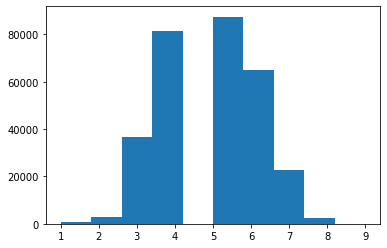

In [41]:
CC = sorted(nx.connected_components(G_small), key = len, reverse=True)

import random
cc0 = np.array(list(CC[0]))
subG = G_small.subgraph(np.random.choice(cc0, 1000))

shortest_paths = nx.shortest_path(subG)
lengths = []
for target, paths in shortest_paths.items():
    for k, value in paths.items():
        lengths.append(len(value))

plt.hist(lengths, 10)
plt.show()

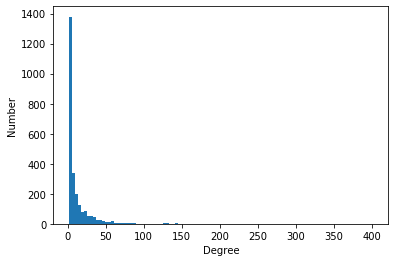

In [61]:
# show node degrees
plt.xlabel('Degree')
plt.ylabel('Number')
plt.hist(dgrs, 100)
plt.show()

На основе данной гистограммы мы можем сделать вывод о том, что сеть удовлетворяет Power Law

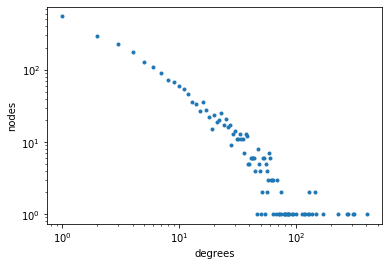

In [42]:
from collections import Counter
d = Counter(degrees)
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.loglog(list(d.keys()), list(d.values()), '.', lw=10)
plt.show()

In [43]:
def get_alpha(x_min):
    new_degrees = []
    for degree in degrees:
        if degree >= x_min:
            new_degrees.append(degree)

    n = len(new_degrees) + 0.0
    
    alpha = 0.0
    for degree in new_degrees:
        alpha = alpha + (np.log(degree / x_min))

    alpha = 1 + n / alpha
    
    return alpha

In [44]:
x_min = 15.0
            
new_degrees = []
for degree in degrees:
    if degree >= x_min:
        new_degrees.append(degree)

n = len(new_degrees) + 0.0

alpha = 0.0
for degree in new_degrees:
    alpha = alpha + (np.log(degree / x_min))

alpha = 1 + n / alpha

alpha = get_alpha(x_min)
sigma = (alpha - 1) / np.sqrt(n)

print('Estimated alpha:', alpha)
print('and sigma squared:', sigma)

Estimated alpha: 2.4439035937753153
and sigma squared: 0.061125313261832175


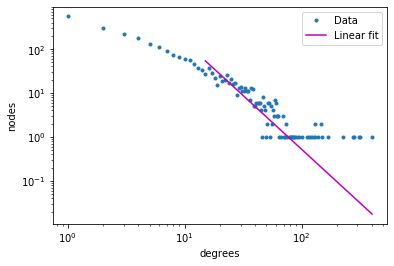

In [45]:
c = Counter(new_degrees)

C = (alpha - 1) * (x_min ** (alpha - 1))

def f(x):
    return C * (x ** (-alpha)) * n
x = np.arange(x_min, max(degrees), 1)

data, = plt.loglog(list(d.keys()), list(d.values()), '.', lw=2, label = 'Data')
fit,  = plt.loglog(x, f(x), 'm', label = 'Linear fit')
plt.xlabel('degrees')
plt.ylabel('nodes')
plt.legend(handles = [data, fit])
plt.show()

In [46]:
# define functions to compute model and experimental CDFS
d_dict = dict(d)

def f_exp(x, x_min):
    result = 0.0
    N = 0.0
    for degree, nodes in d_dict.items():
        if degree >= x_min:
            N += nodes
            if degree <= x:
                result += nodes
    return result / N


def f_model(x, x_min, alpha):
    return 1 - (x / x_min) ** (1 - alpha)

In [47]:
# this is for plot D(x_min)
D_cords = dict()

def calculate_D(x_min):
    array = []
    alpha = get_alpha(x_min)
    for degree in d_dict.keys():
        if degree >= x_min:
            result = np.abs(f_model(degree, x_min, alpha) - f_exp(degree, x_min))
            array.append(result)
            D_cords[x_min] = result
    return max(array)

temp = dict()
for degree in d_dict.keys():
    if degree < 628:    
        temp[degree] = calculate_D(degree + 0.0)

/Users/polinabykova/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: RuntimeWarning: divide by zero encountered in double_scalars
  del sys.path[0]


In [48]:
real_x_min = min(temp,key=temp.get) + 0.0
print(real_x_min)

real_alpha = get_alpha(real_x_min)
real_C = (real_alpha - 1) * (real_x_min ** (real_alpha - 1))

24.0


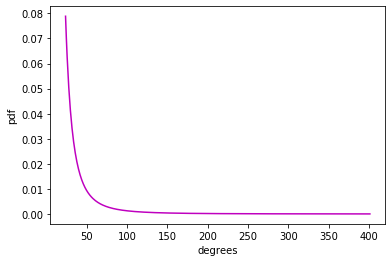

In [49]:
def pdf(x):
    return real_C * x ** (-real_alpha)
x = np.arange(real_x_min, max(degrees), 1)

plt.xlabel('degrees')
plt.ylabel('pdf')
plt.plot(x, pdf(x), 'm', label = 'PDF')
plt.show()

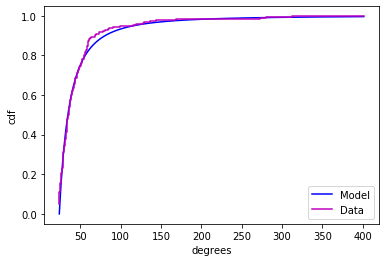

In [50]:
def cdf(x):
    return 1 - (x / real_x_min) ** (1 - real_alpha)

model, = plt.plot(x, cdf(x), 'b', label = 'Model')
y = []
for point in x:
    y.append(f_exp(point, real_x_min))
data,  = plt.step(x, y, 'm', label = 'Data')
plt.xlabel('degrees')
plt.ylabel('cdf')
plt.legend(handles = [model, data])
plt.show()

### Task 3. Structural analysis

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree <br>
3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree <br>
3.3. Print 5 nodes with maximum eigenvector centrality, vizualize your graph with color or size as the function of degree <br>
3.4 Print histogram with centralities distribution of your graph <br>

3.1. Print 5 nodes with maximum degree centrality, vizualize your graph with color or size as the function of degree 

Degree Centrality 

In [51]:
# take only giant connected component for the further analysis: 
Gc = max(nx.connected_component_subgraphs(G_small), key=len)
print("Number of nodes -", len(Gc.nodes()))
print("Number of edges -", len(Gc.edges()))

Number of nodes - 2507
Number of edges - 14348


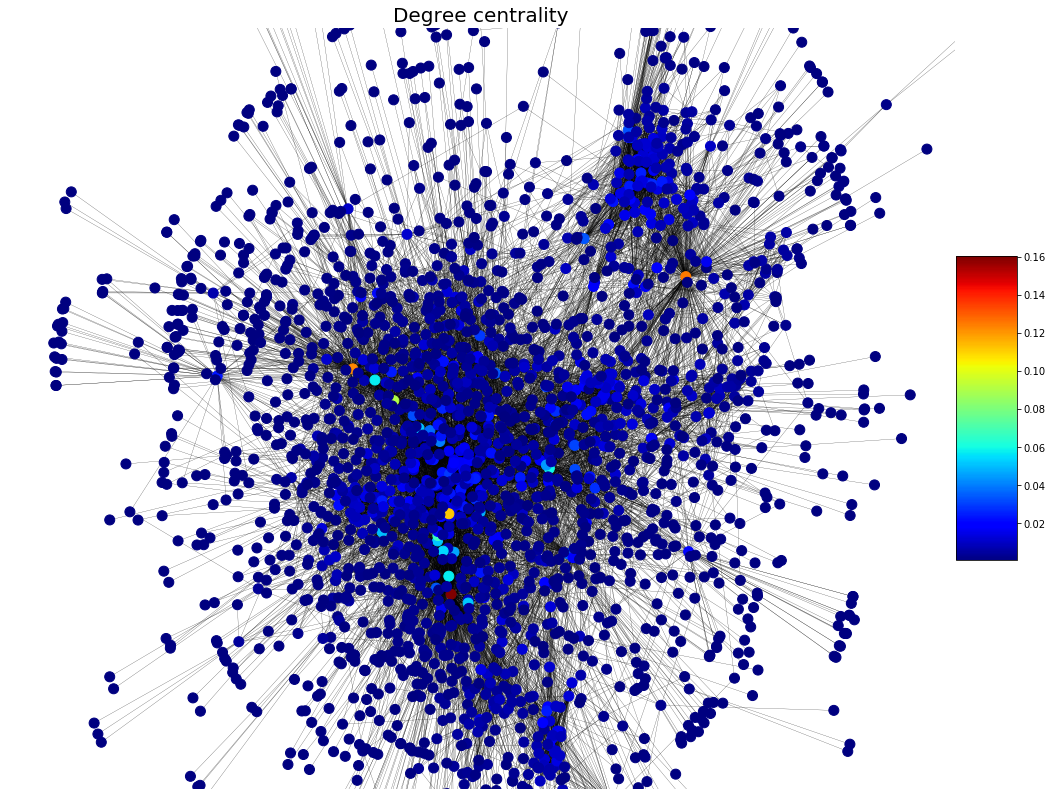

In [52]:
plt.figure(figsize=(20,14))
degree_centr = nx.degree_centrality(Gc)
node_colors = list(degree_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(degree_centr.keys()),
                               cmap = 'jet',
                               with_labels = False)
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=5)
plt.title('Degree centrality', fontsize = 20)
plt.axis("off")

top_nodes = sorted(degree_centr, key = degree_centr.get)[-3:]

3.2. Print 5 nodes with maximum betweenness centrality, vizualize your graph with color or size as the function of degree 

Betweenness centrality

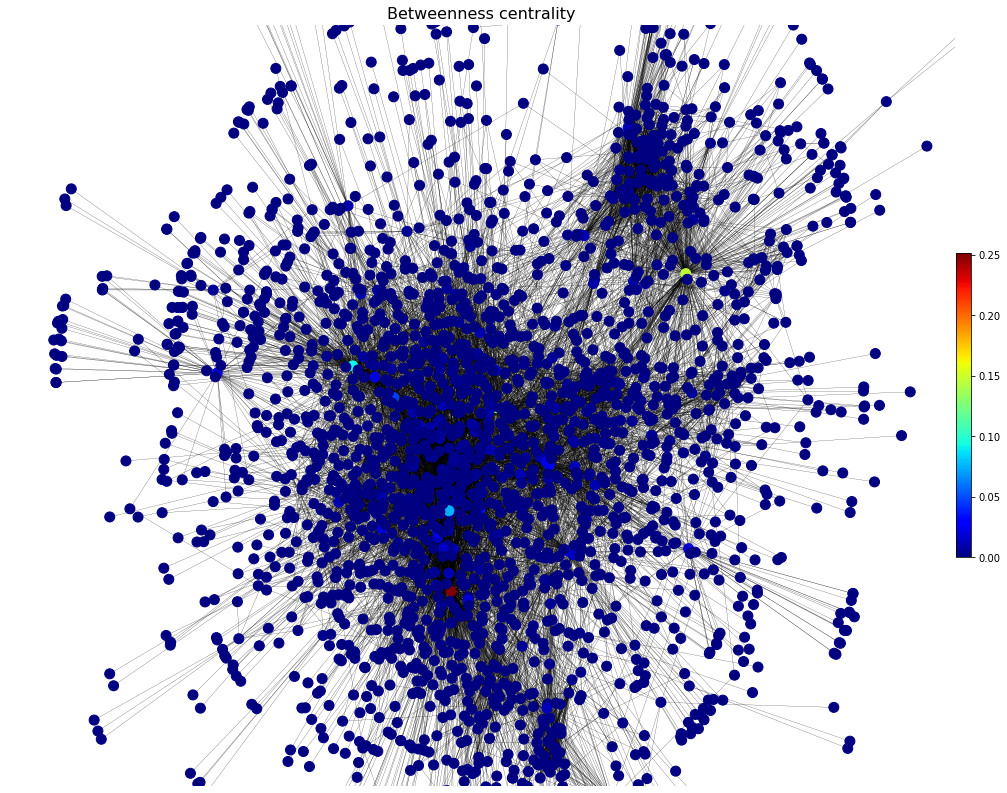

In [53]:
plt.figure(figsize=(20,14))
between_centr = nx.betweenness_centrality(Gc)
node_colors = list(between_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(between_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Betweenness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(between_centr, key = between_centr.get)[-5:]

Closeness centrality

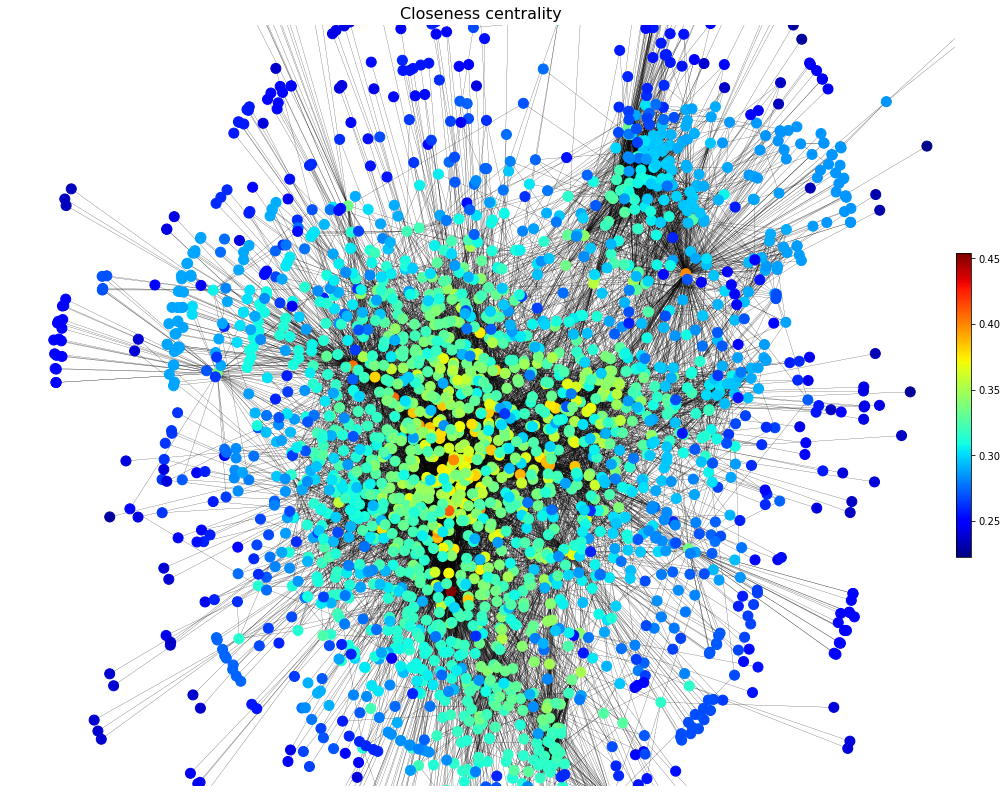

In [54]:
plt.figure(figsize=(20,14))
closeness_centr = nx.closeness_centrality(Gc)
node_colors = list(closeness_centr.values())

nodes = nx.draw_networkx_nodes(Gc, pos = coord, 
                               node_color=node_colors,
                               node_size = 100,
                               nodelist=list(closeness_centr.keys()),
                               cmap = 'jet',
                               with_labels = False
                               )
edges = nx.draw_networkx_edges(Gc, pos = coord, width = .2)
plt.xlim([-.95, .9])
plt.ylim([-.5, .6])
plt.colorbar(nodes, shrink=.4, pad=.0005, aspect=20)
plt.title('Closeness centrality', fontsize = 16)
plt.axis("off")

top_nodes = sorted(closeness_centr, key = closeness_centr.get)[-3:]

3.4 Print histogram with centralities distribution of your graph 

Histograms with centralities 

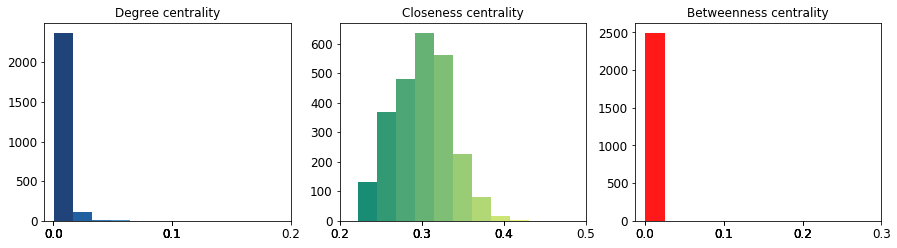

In [55]:
plt.figure(figsize=(15, 8))
plt.subplot(2, 3, 1)
plt.title("Degree centrality", y = 1.00)
plot_hist(data = list(degree_centr.values()), colormap = 'Blues_r', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 3, 2)
plt.title("Closeness centrality", y = 1.00)
plot_hist(data = list(closeness_centr.values()), colormap = 'summer', alpha = 0.9, bins = 10, round_value=1)

plt.subplot(2, 3,3)
plt.title("Betweenness centrality", y = 1.00)
plot_hist(data = list(between_centr.values()), colormap = 'autumn', alpha = 0.9, bins = 10)



In [56]:
# Degree centrality
dc = nx.degree_centrality(G_small)
# Closeness centrality
cc = nx.closeness_centrality(G_small)

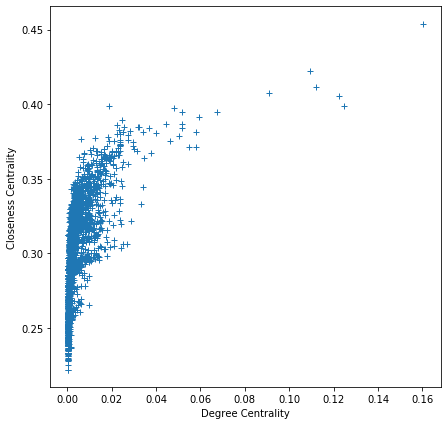

In [57]:
# Plot closeness vs degree centralities
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')

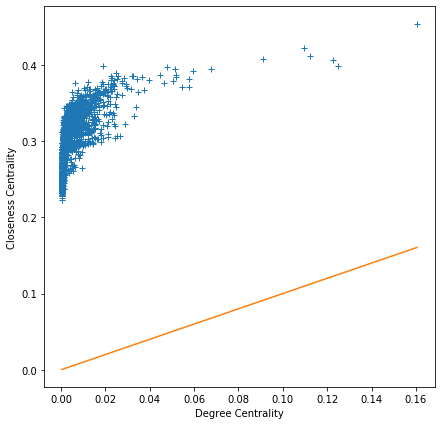

In [58]:
# Plot closeness vs degree centralities with an added line!
xdata = list(dc.values())
ydata = list(cc.values())
plt.figure(1, figsize=(7,7))
plt.xlabel('Degree Centrality')
plt.ylabel('Closeness Centrality')
p=plt.plot(xdata,ydata, '+')
x=np.arange(min(xdata),max(xdata),0.01)
p=plt.plot(x,x)

In [59]:
bc = nx.betweenness_centrality(G_small)

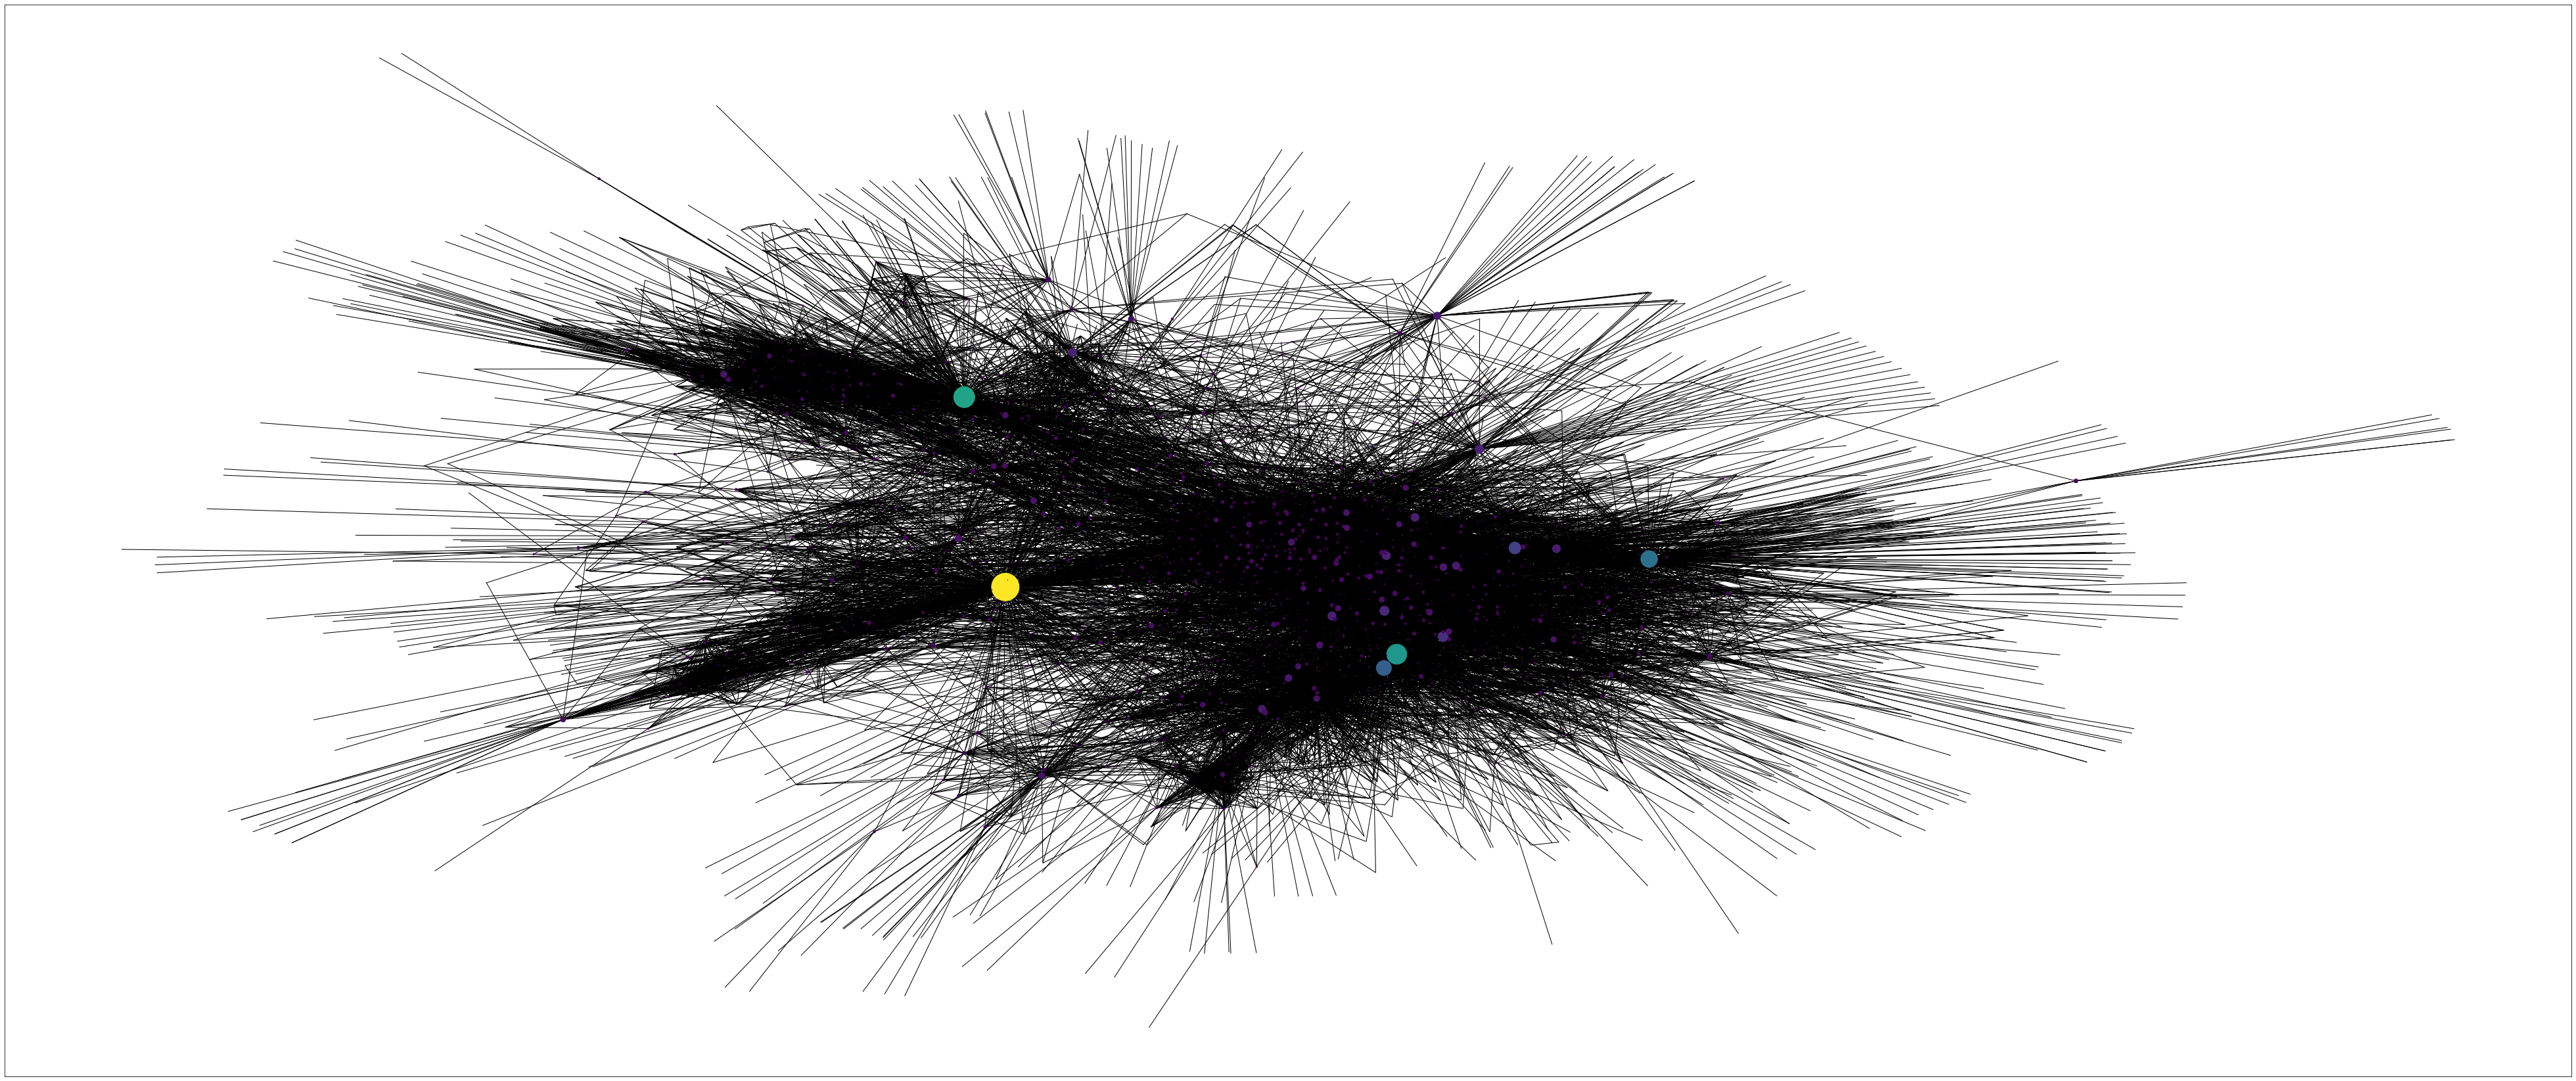

In [60]:
plt.figure(1, figsize=(70,30))
nx.draw_networkx(G_small,
          pos,
          nodelist=list(cc.keys()),
          node_size = [c*7000 for c in bc.values()],
          node_color=list(bc.values()),
          font_size=30,
          font_color='red',          
            with_labels=False
          )
plt.show()